In [ ]:
import pickle
with open('amewoo_mop_params_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    params = pickle.load(f)
with open('amewoo_mop_losses_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    losses = pickle.load(f)

In [1]:
import pickle
import os

losses = {}

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/training_speed_stress_test/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

In [3]:
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/number_of_components_1d_grid_search/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

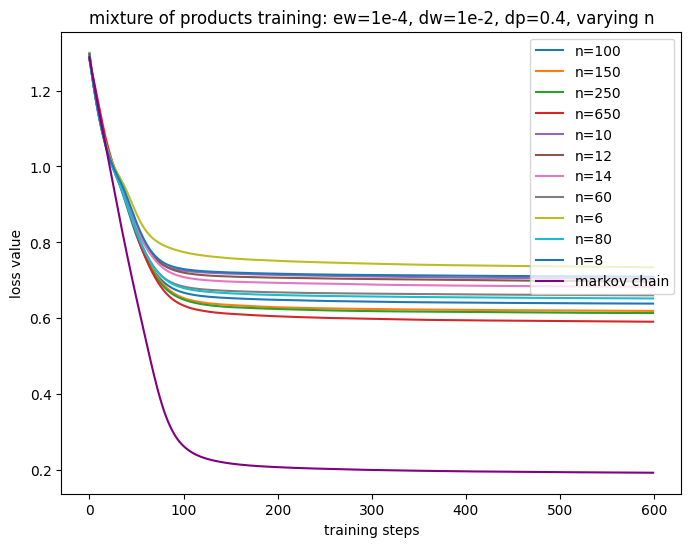

In [4]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in losses.keys():
    if key < 60 and key > 15:
        continue
    ax.plot(losses[key], label=f"n={key}")
ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: ew=1e-4, dw=1e-2, dp=0.4, varying n"
    
)
plt.show()